# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data presentation
- **Population :** EV charging sessions in Palo Alto, California 

- **Sample :** 259415 sessions recorded in public charging stations between July 2011 and December 2020. After cleaning, we are left with 259370 rows.

- **Data description :** The dataset was created as part of the Palo Alto Open Data initiative. The data includes charging station name, location, charging session durations, energy consumption, time and other relevant metrics of the charging session.

**Variables of interest after cleanup and processing** :  

* **Station Name (Categorical):**  
Description : Name of station where the charging session occurred, is unique to each station. The variable has 47 levels i.e. 47 charging stations.

* **Start Date (Timestamp):**  
Description : Timestamp indicating the start time of the charging session.

* **End Date (Timestamp):**  
Description : Timestamp indicating the end time of the charging session.

* **Total Duration (Continuous):**  
Description : The total duration of charging sessions in hours. We converted the (hh:mm:ss) duration format into floats in hours. Ranges from 0.016667 to 114.539167 hours.

* **Charging Time (Continuous):**  
Description : Different from Total Duration, it is the duration in hours where the station is actively charging the car. We converted the (hh:mm:ss) duration format into floats in hours. Ranges from 0.001667 to 22.931944 hours.

* **Energy (Continuous):**  
Description : The amount of electrical energy consumed during the charging session in kWh. Ranges from 0.010000	to 97.360000 kWh.  
Type : Numerical continuous  

* **GHG Savings (Continuous):**  
Description : The greenhouse gas emissions avoided by using electric charging stations. Ranges from 0.004000 to 40.891000 kg.
Type : Numerical continuous  

* **Gasoline Savings (Continuous):**  
Description : The amount of gasoline avoid by using electric charging in gallons. Ranges 0.001000 to 12.219000 gallons.	
Type : Numerical continuous  

* **Latitude and Longitude (Continuous variables):**  
Description : GPS coordinates of the station where the charging session occurred.



## Data Import

In [2]:
df = pd.read_csv('EVChargingStationUsage.csv')
df

/var/folders/0f/4l5yr1gx3xn88xhbz1m_1v140000gn/T/ipykernel_79002/100100954.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


## Data Cleaning

### Discarding irrelevant columns

In [3]:
df.drop(columns=['MAC Address','County', 'System S/N', 'Model Number','EVSE ID','Port Type','Port Number','Plug Type','Fee','Currency','Address 1','City','State/Province','Postal Code','Country','Ended By','Plug In Event Id','Driver Postal Code','Org Name','Transaction Date (Pacific Time)','User ID'],inplace=True)

### Converting duration variables into hours

In [4]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)']).dt.total_seconds()/3600
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)']).dt.total_seconds()/3600

df.rename(columns = {'Total Duration (hh:mm:ss)': 'Total Duration (hours)', 'Charging Time (hh:mm:ss)': 'Charging Time (hours)'}, inplace = True)

### Harmonizing into Pacific Daylight Time (PDT)

In [5]:
df['Start Time Zone'].unique(), df['End Time Zone'].unique() 

(array(['PDT', 'PST', 'UTC'], dtype=object),
 array(['PDT', 'PST', 'UTC'], dtype=object))

Pacific Standard Time (PST) is one hour behind Pacific Daylight Time (PDT).
Coordinated Universal Time (UTC) is seven hours ahead of Pacific Daylight Time (PDT).
So we harmonize the timestamps accordingly.

In [6]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M', errors = 'coerce')


df.loc[df['Start Time Zone'] == 'PST', 'Start Date'] = df['Start Date'] + dt.timedelta(hours=1)
df.loc[df['End Time Zone'] == 'PST', 'End Date'] = df['End Date'] + dt.timedelta(hours=1)

df.loc[df['Start Time Zone'] == 'UTC', 'Start Date'] = df['Start Date'] - dt.timedelta(hours=7)
df.loc[df['End Time Zone'] == 'UTC', 'End Date'] = df['End Date'] - dt.timedelta(hours=7)

df.drop(columns = ['Start Time Zone','End Time Zone'], inplace = True)

### Removing rows with duplicates

In [7]:
df.drop_duplicates(inplace = True) 

### Removing row with empty values

In [8]:
df.dropna(inplace = True)

### Cleaned Dataset

In [9]:
df

,Station Name,Start Date,End Date,Total Duration (hours),Charging Time (hours),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude
0,PALO ALTO CA / HAMILTON #1,2011-07-29 20:17:00,2011-07-29 23:20:00,3.058889,1.900833,6.249457,2.625,0.784,37.444572,-122.160309
1,PALO ALTO CA / HAMILTON #1,2011-07-30 00:00:00,2011-07-30 00:02:00,0.035000,0.031667,0.106588,0.045,0.013,37.444572,-122.160309
2,PALO ALTO CA / HAMILTON #1,2011-07-30 08:16:00,2011-07-30 12:34:00,4.292222,4.291111,14.951777,6.280,1.876,37.444572,-122.160309
3,PALO ALTO CA / HAMILTON #1,2011-07-30 14:51:00,2011-07-30 16:55:00,2.056667,2.049444,7.159643,3.007,0.899,37.444572,-122.160309
4,PALO ALTO CA / HAMILTON #1,2011-07-30 18:51:00,2011-07-30 20:03:00,1.190000,0.731667,1.957765,0.822,0.246,37.444572,-122.160309
...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,2020-12-31 17:39:00,2020-12-31 18:14:00,0.595556,0.588333,1.841000,0.773,0.231,37.428623,-122.144043
259411,PALO ALTO CA / WEBSTER #1,2020-12-31 17:48:00,2020-12-31 21:31:00,3.716944,2.234444,12.744000,5.352,1.599,37.448284,-122.158272
259412,PALO ALTO CA / MPL #4,2020-12-31 18:28:00,2021-01-01 11:56:00,17.470556,5.136667,29.665000,12.459,3.723,37.422104,-122.113510
259413,PALO ALTO CA / WEBSTER #1,2020-12-31 18:49:00,2020-12-31 22:55:00,4.092778,3.895000,11.976000,5.030,1.503,37.448284,-122.158272


## Summary Stats

In [10]:
df.describe()

,Start Date,End Date,Total Duration (hours),Charging Time (hours),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude
count,259370,259370,259370.000000,259370.000000,259370.000000,259370.000000,259370.000000,259370.000000,259370.000000
mean,2017-06-15 03:49:10.781586176,2017-06-15 06:24:16.849828352,2.486835,1.999147,8.544431,3.588661,1.072325,37.439565,-122.151265
min,2011-07-29 20:17:00,2011-07-29 23:20:00,0.016667,0.001667,0.010000,0.004000,0.001000,37.422104,-122.163239
25%,2016-04-12 19:51:15,2016-04-12 22:36:45,1.170833,1.040000,3.784000,1.589000,0.475000,37.428318,-122.162170
50%,2017-07-15 11:43:00,2017-07-15 13:43:00,2.089167,1.816389,6.868619,2.885000,0.862000,37.444489,-122.158272
75%,2019-01-25 10:14:45,2019-01-25 13:10:45,3.090000,2.697222,11.459000,4.813000,1.438000,37.446613,-122.145699
max,2020-12-31 19:19:00,2021-01-04 22:01:00,114.539167,22.931944,97.360000,40.891000,12.219000,37.449375,-122.112480
std,NaN,NaN,2.212738,1.382622,7.185743,3.018012,0.901811,0.009621,0.015381


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259370 entries, 0 to 259414
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Station Name                259370 non-null  object        
 1   Start Date                  259370 non-null  datetime64[ns]
 2   End Date                    259370 non-null  datetime64[ns]
 3   Total Duration (hours)      259370 non-null  float64       
 4   Charging Time (hours)       259370 non-null  float64       
 5   Energy (kWh)                259370 non-null  float64       
 6   GHG Savings (kg)            259370 non-null  float64       
 7   Gasoline Savings (gallons)  259370 non-null  float64       
 8   Latitude                    259370 non-null  float64       
 9   Longitude                   259370 non-null  float64       
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 21.8+ MB


The cleaning appears to be successful.

## Univariate Representations

### Continuous Variables 

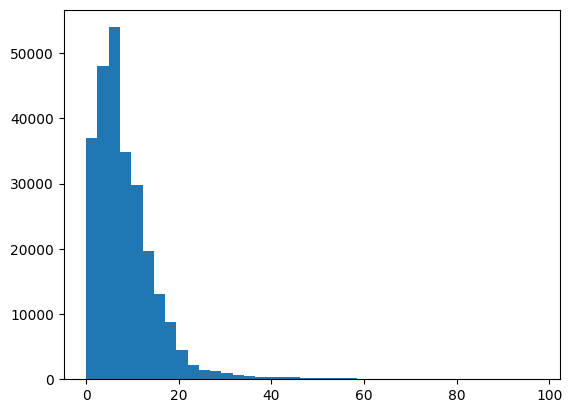

In [12]:
bins = 40
plt.hist(df['Energy (kWh)'],bins)
plt.show()

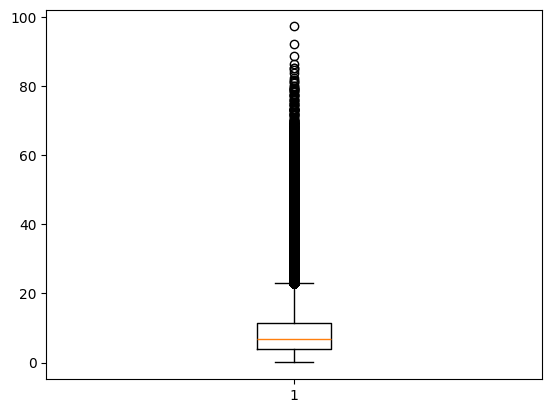

In [13]:
plt.boxplot(df['Energy (kWh)'])
plt.show()

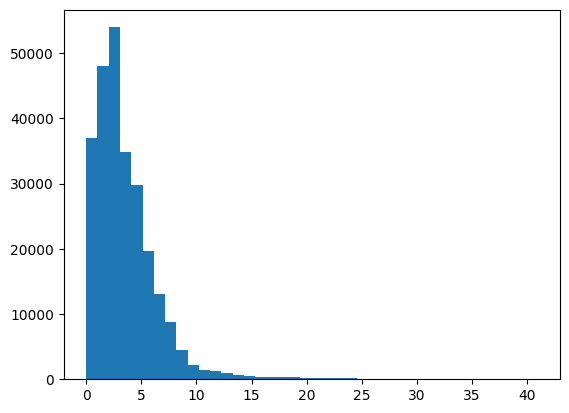

In [14]:
bins = 40
plt.hist(df['GHG Savings (kg)'],bins)
plt.show()

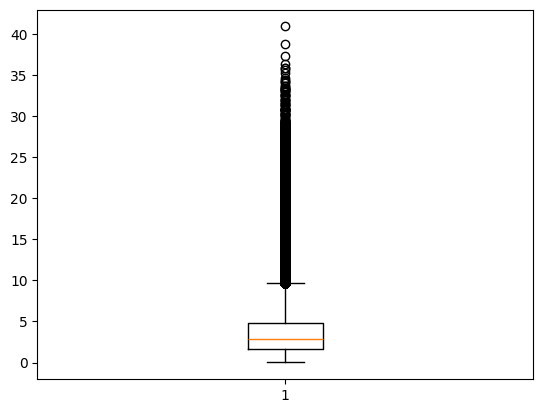

In [15]:
plt.boxplot(df['GHG Savings (kg)'])
plt.show()

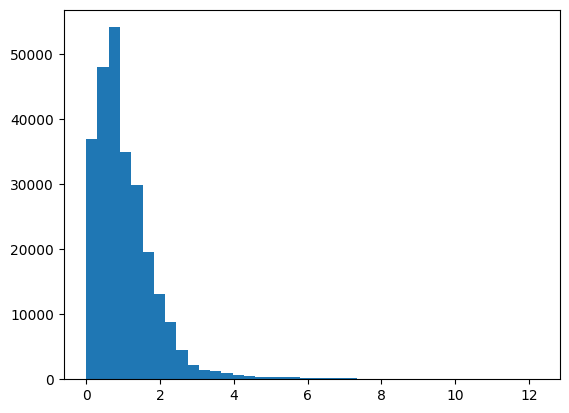

In [16]:
bins = 40
plt.hist(df['Gasoline Savings (gallons)'],bins)
plt.show()

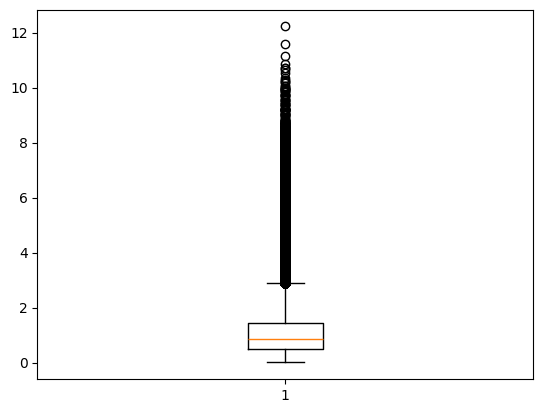

In [17]:
plt.boxplot(df['Gasoline Savings (gallons)'])
plt.show()

#### Remark 1

Energy, GHG Savings and Gasoline Savings all have the same distribution because the last two were most likely computed from the Energy variable as a way of quantifying their good environmental impact. It can be interesting to have these variables alongside Energy to emphasize the environmental impact of EVs in our visualizations.

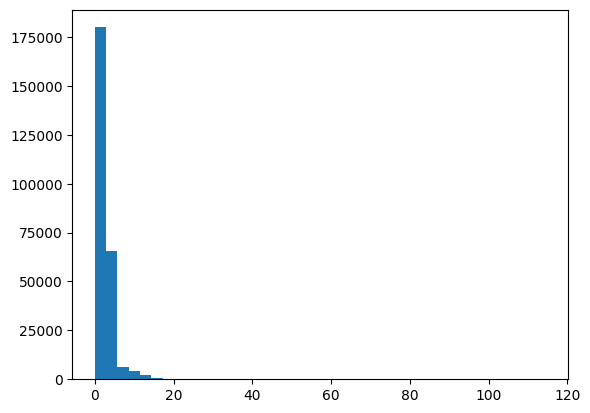

In [18]:
bins = 40
plt.hist(df['Total Duration (hours)'],bins)
plt.show()

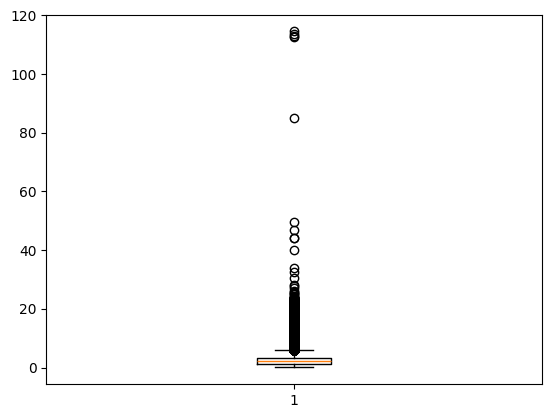

In [19]:
plt.boxplot(df['Total Duration (hours)'])
plt.show()

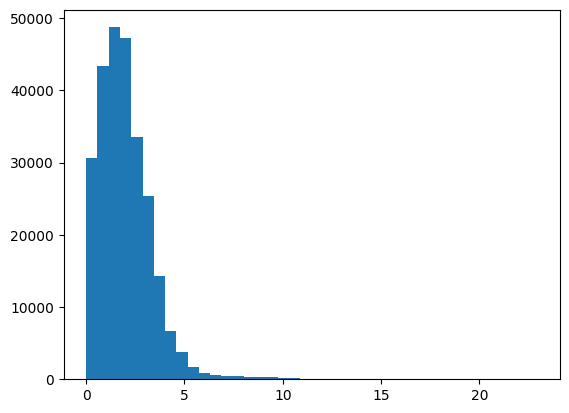

In [20]:
bins = 40
plt.hist(df['Charging Time (hours)'],bins)
plt.show()

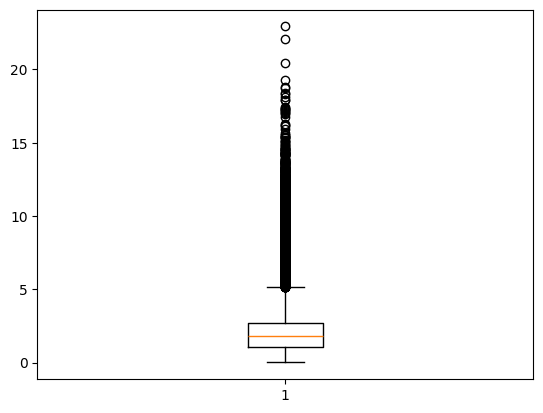

In [21]:
plt.boxplot(df['Charging Time (hours)'])
plt.show()

#### Remark 2

The boxplots show many outliers. This is explained by our large sample size and the high positive skew of the variables as shown in histograms.

## Grouped Graphical Representations

### Identifying Moments Of Peak Station Usage And Peak Energy Consumption

#### Day of week Variable

The new variable allows us to perform a groupby to better observe charging station usage and energy consumption on days of the week.

In [22]:
df['Day of week'] = df['Start Date'].dt.day_name()

In [23]:
df_energy = df.groupby('Day of week')['Energy (kWh)'].apply(list).apply(pd.Series).T
df_energy

Day of week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,6.249457,5.041244,0.106588,17.171463,10.598673,3.516131,12.837713
1,12.238361,6.152762,14.951777,3.799148,2.003678,4.197217,4.620635
2,6.886972,5.255038,7.159643,16.238552,3.627027,8.497075,2.340949
3,3.956375,5.956442,1.957765,4.457012,8.740360,6.233372,3.013084
4,4.807265,0.737101,4.802880,8.940147,7.400985,2.832791,8.832448
...,...,...,...,...,...,...,...
40480,NaN,NaN,NaN,NaN,NaN,NaN,1.518000
40481,NaN,NaN,NaN,NaN,NaN,NaN,27.320000
40482,NaN,NaN,NaN,NaN,NaN,NaN,7.441000
40483,NaN,NaN,NaN,NaN,NaN,NaN,4.494000


In [24]:
energy_sum = pd.DataFrame(df_energy.sum())
energy_sum.rename(columns = {0:'Total energy (kWh)'},inplace = True)

energy_sum

,Total energy (kWh)
Day of week,
Friday,345810.059439
Monday,331294.589984
Saturday,258812.722494
Sunday,239555.025739
Thursday,348484.819962
Tuesday,342938.981224
Wednesday,349272.894042


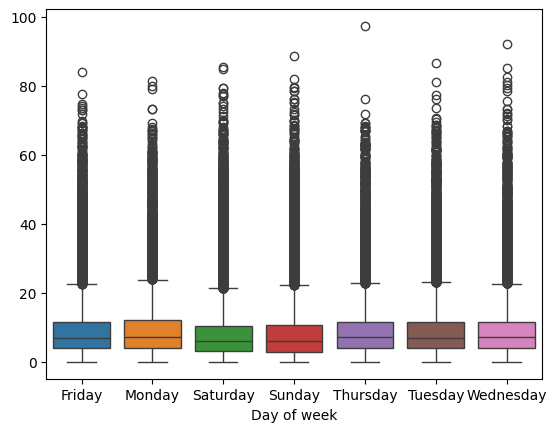

In [25]:
sns.boxplot(df_energy)
plt.show()

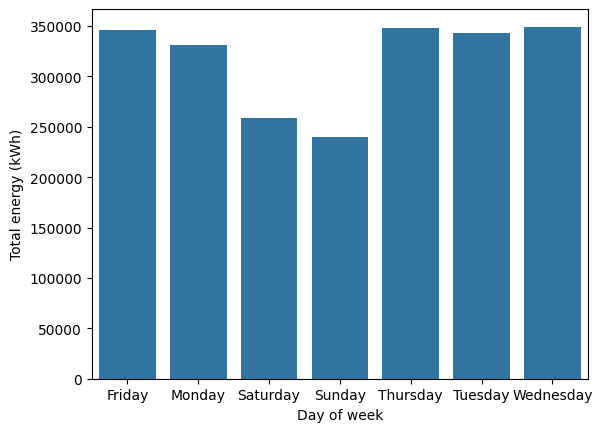

In [26]:
sns.barplot(energy_sum['Total energy (kWh)'])
plt.show()

In [27]:
df_duration = df.groupby('Day of week')['Total Duration (hours)'].apply(list).apply(pd.Series).T
df_duration

Day of week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3.058889,3.392778,0.035000,6.105278,3.673889,1.013889,3.681389
1,3.510000,3.484444,4.292222,1.165000,0.574722,1.211944,1.742222
2,2.268056,1.508611,2.056667,4.829444,1.595556,2.446111,0.812778
3,1.234167,1.723333,1.190000,18.315833,2.975833,2.251667,1.045833
4,1.648611,1.574722,3.870278,3.546667,2.471389,0.821944,9.985278
...,...,...,...,...,...,...,...
40480,NaN,NaN,NaN,NaN,NaN,NaN,0.258056
40481,NaN,NaN,NaN,NaN,NaN,NaN,4.526667
40482,NaN,NaN,NaN,NaN,NaN,NaN,2.653333
40483,NaN,NaN,NaN,NaN,NaN,NaN,0.765000


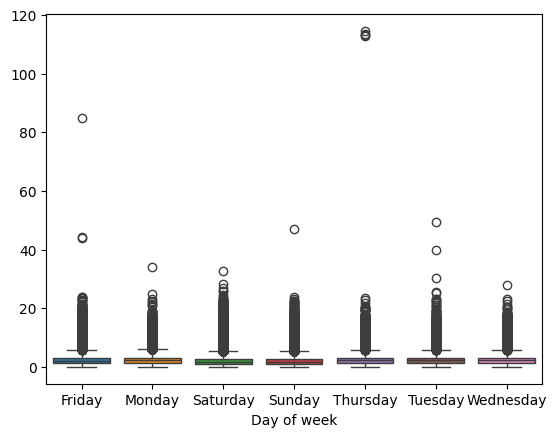

In [28]:
sns.boxplot(df_duration)
plt.show()

In [29]:
duration_sum = pd.DataFrame(df_duration.sum())
duration_sum.rename(columns = {0:'Total duration (hours)'},inplace = True)

duration_sum

,Total duration (hours)
Day of week,
Friday,101241.262222
Monday,96767.918611
Saturday,73273.735556
Sunday,66398.700556
Thursday,102481.313889
Tuesday,101547.659167
Wednesday,103299.810278


<Axes: xlabel='Day of week', ylabel='Total duration (hours)'>

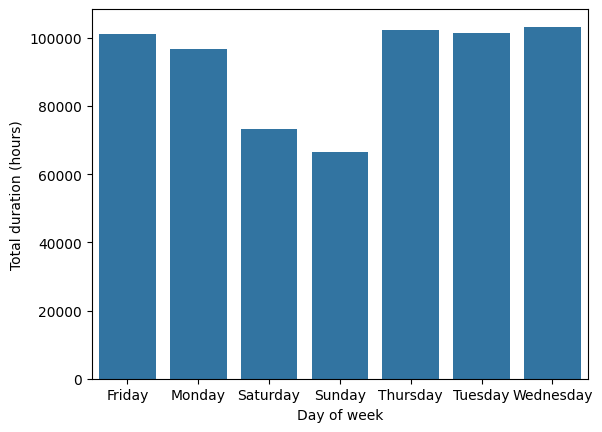

In [30]:
sns.barplot(duration_sum['Total duration (hours)'])

In the week, we notice that charging sessions are longest and energy consumption is highest on weekdays compared to weekends.

#### Time of day Variable

The new variable allows us to perform a groupby to better observe charging station usage and energy consumption throughout the day.

In [31]:
df['Time of day'] = pd.cut(df['Start Date'].dt.hour,bins = [0, 5, 12, 18, 21, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], ordered=False)

In [32]:
mean_by_time_of_day = df.groupby('Time of day')['Energy (kWh)'].mean()

/var/folders/0f/4l5yr1gx3xn88xhbz1m_1v140000gn/T/ipykernel_79002/898437357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_time_of_day = df.groupby('Time of day')['Energy (kWh)'].mean()


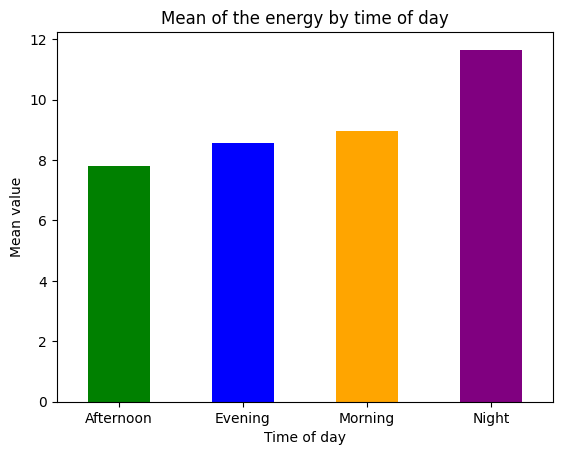

In [33]:
mean_by_time_of_day.plot(kind='bar', color=['green', 'blue', 'orange', 'purple'])
plt.title('Mean of the energy by time of day')
plt.xlabel('Time of day')
plt.ylabel('Mean value')
plt.xticks(rotation=0)
plt.show()

/var/folders/0f/4l5yr1gx3xn88xhbz1m_1v140000gn/T/ipykernel_79002/356025021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_by_time_of_day = df.groupby('Time of day')['Energy (kWh)'].sum()


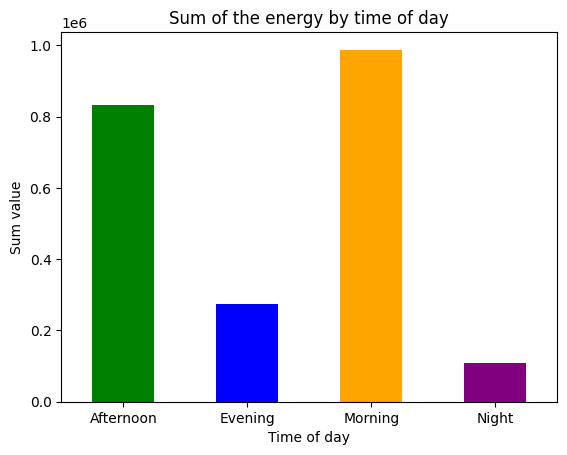

In [34]:
sum_by_time_of_day = df.groupby('Time of day')['Energy (kWh)'].sum()
sum_by_time_of_day.plot(kind='bar', color=['green', 'blue', 'orange', 'purple'])
plt.title('Sum of the energy by time of day')
plt.xlabel('Time of day')
plt.ylabel('Sum value')
plt.xticks(rotation=0)
plt.show()

When grouping Energy by the time of day, the graphs for sum values and mean values are strikingly different. We notice that the highest mean energy consumption is at night. Meanwhile, the highest sums of energy consumption are in the morning and the evening. 

We can assume that charging sessions tend to be longer at night and thus consume more energy on average but stations see more use in the morning and the afternoon.

#### Groupby Station Name

We can group by charging station via Station Name to see which ones have the highest traffic.

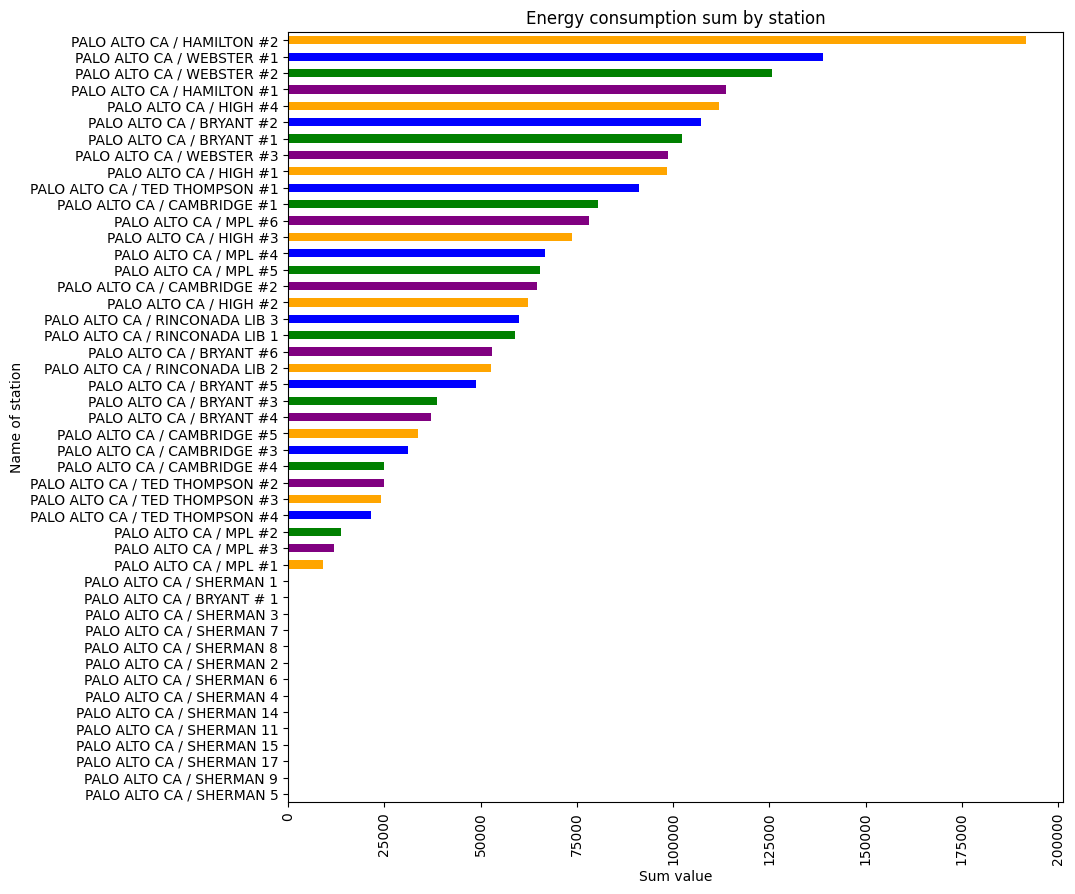

In [35]:
plt.figure(figsize = (10, 10))
energy_by_station =  df.groupby('Station Name')['Energy (kWh)'].sum()
energy_by_station = energy_by_station.sort_values(ascending=True)
energy_by_station.plot(kind = 'barh', color=['green', 'blue', 'orange', 'purple'])
plt.title('Energy consumption sum by station')
plt.ylabel('Name of station')
plt.xlabel('Sum value')
plt.xticks(rotation=90)
plt.show()


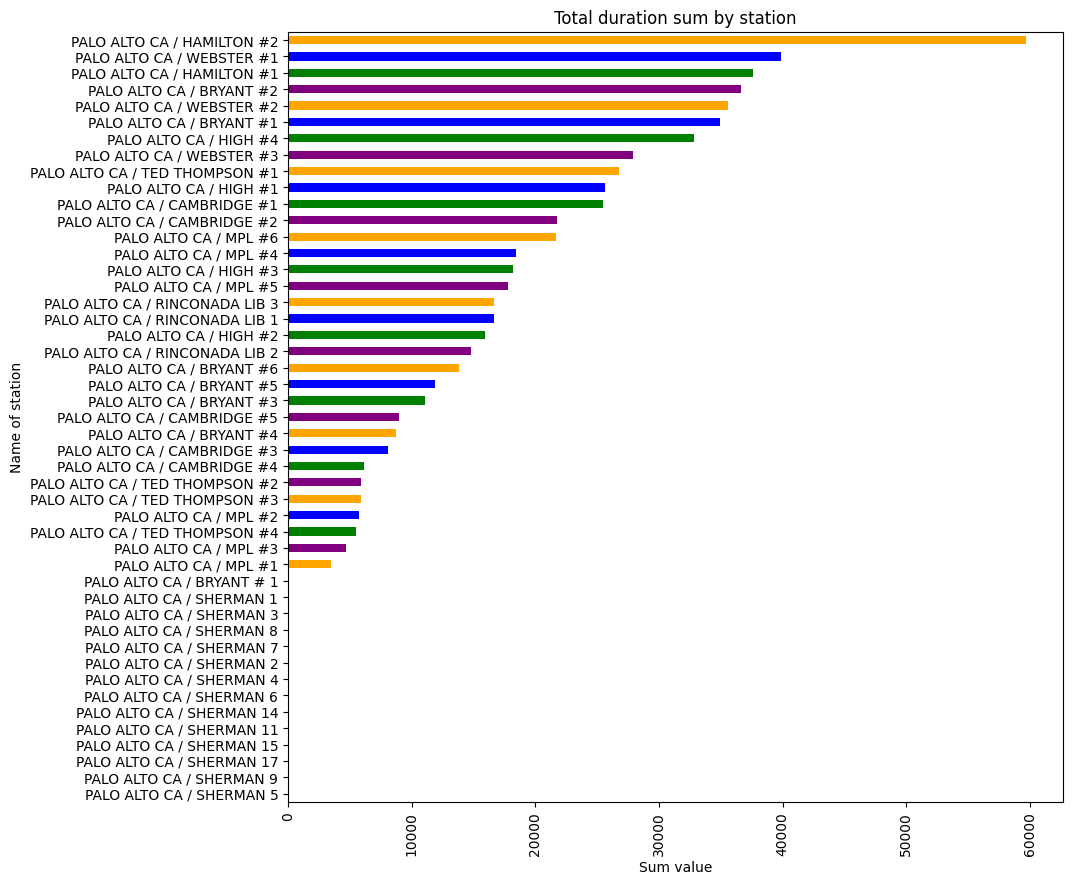

In [36]:
plt.figure(figsize=(10, 10))
total_duration_by_station =  df.groupby('Station Name')['Total Duration (hours)'].sum()
total_duration_by_station=total_duration_by_station.sort_values(ascending=True)
total_duration_by_station.plot(kind='barh', color=['green', 'blue', 'orange', 'purple'])
plt.title('Total duration sum by station')
plt.ylabel('Name of station')
plt.xlabel('Sum value')
plt.xticks(rotation=90)
plt.show()

## Conclusion

During the EDA, we found many features of the dataset that allow for many visualizations. 

For instance, the stations have GPS coordinates. We may create a proportional symbol map of Palo Alto, the symbols can be scaled according to Total Duration to show which stations are most used. 

We also grouped Energy by the time of day. We may increase the bin size to get even more granular, maybe to 24, one per hour of day and create a clock shaped visualization, for example to show which hour has the highest energy consumption. This is especially useful for power grid management because if we can identify peak hours, then the grid can plan its voltage for them.